In [169]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

In [170]:
## list of data tables
full_data = []
'''data_ngrid = [50,100,200,300,400,500,600,700,800]
prefs      = ['../outputs/nospin_rmax1e4/n50/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n100/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n200/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n300/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n400/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n500/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n600/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n700/evolve_rmin60_rad_',
              '../outputs/nospin_rmax1e4/n800/evolve_rmin60_rad_']
'''
'''data_ngrid = [50,100,200,300,400,500,600,700,800]
prefs      = ['../outputs/tilt1_rmax1e4/n50/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n100/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n200/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n300/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n400/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n500/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n600/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n700/evolve_rmin60_rad_',
              '../outputs/tilt1_rmax1e4/n800/evolve_rmin60_rad_']'''
data_ngrid = [50,100,200,300,400]#,500,600,700,800]
prefs      = ['../outputs/tilt45_rmax1e4/n50/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4/n100/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4/n200/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4/n400/evolve_rmin60_rad_']
# ngrid, tgrid don't actually matter if we don't convert our coordinates
ngrid = 1000 
tgrid = 1000 
HoR   = 1e-3 
do_conversion = False
order = 1 # always!

for i,pref in enumerate(prefs):
    full_data.append(build_data(pref,ngrid,tgrid,data_ngrid[i],
                                convert=do_conversion,HoR=HoR,order=order))

500000.5


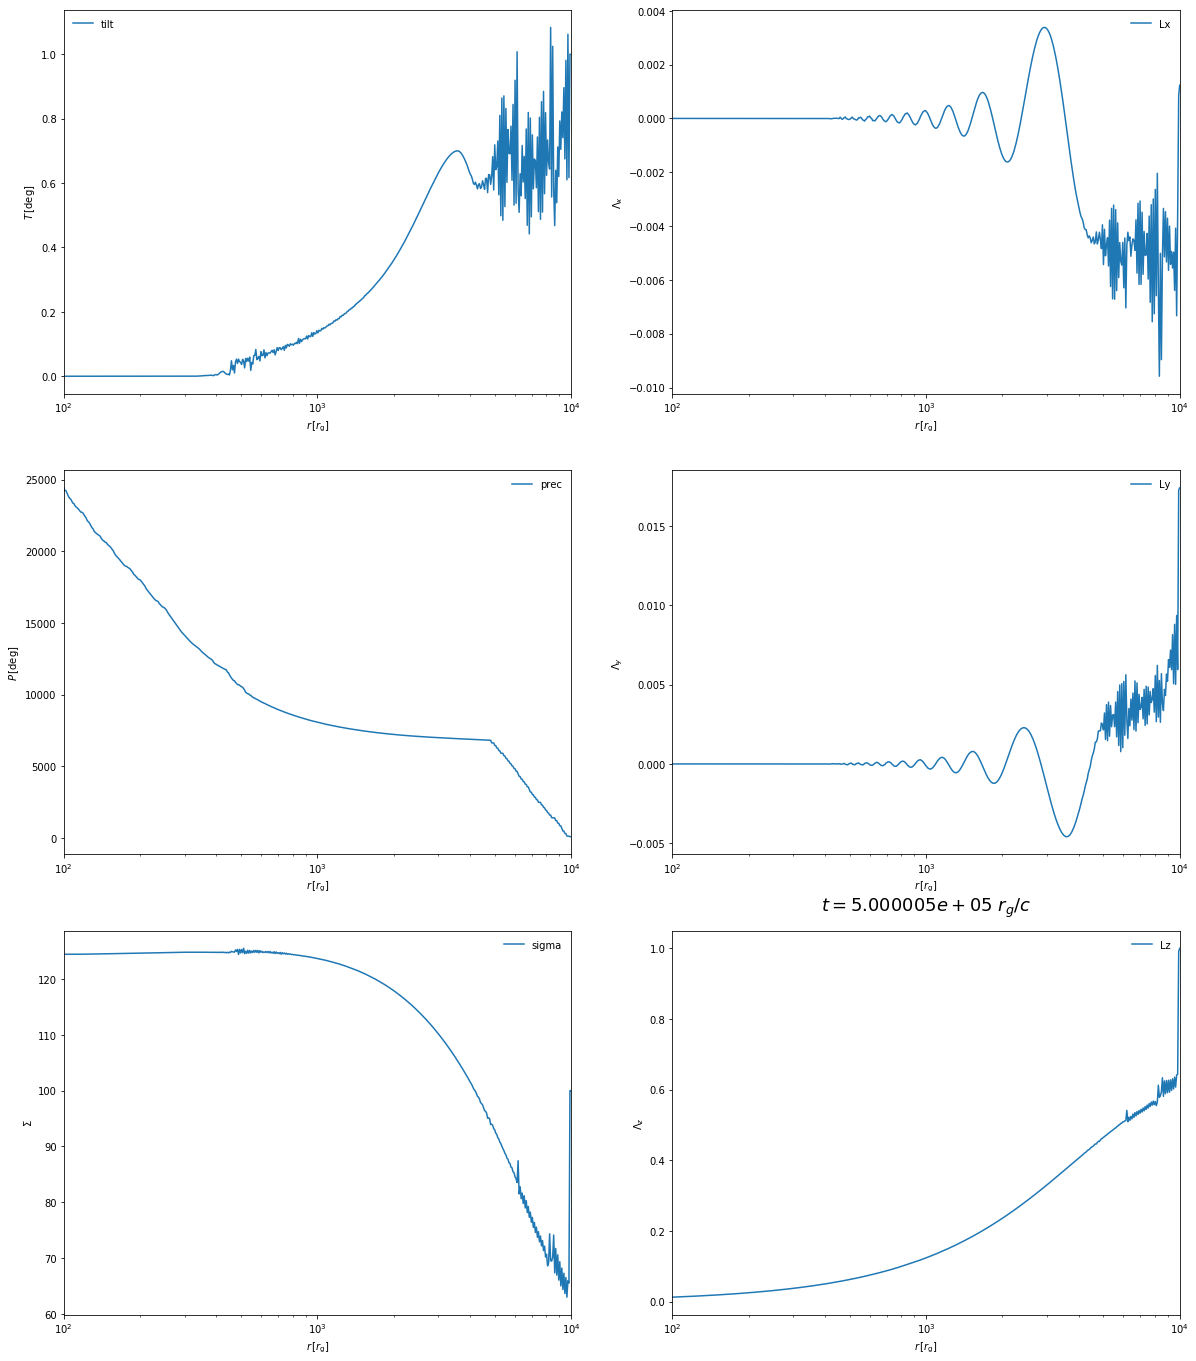

In [120]:
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_interface_multi(table_list,ind):
    grid_no    = [100,200,300,400,500]
    labels     = ['ngrid=50','ngrid=100','ngrid=200','ngrid=300','ngrid=400','n500']
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    for i,table in enumerate(table_list):
        plot_r = table["r"][:,ind]
        plot_t = table["tilt"][:,ind]
        plot_p = table["prec"][:,ind]
        plot_d = table["sigma"][:,ind]
        plot_Lx = table["Lx"][:,ind]
        plot_Ly  = table["Ly"][:,ind]
        plot_Lz  = table["Lz"][:,ind]

        time = np.average(table["t"][:,ind])

        rmin = np.min(plot_r)
        rmax = np.max(plot_r)

        ax[0][0].plot(plot_r,plot_t)#,label=labels[i])
        ax[0][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[0][0].set_ylabel(r'$T\,[{\rm deg}]$')
        #ax[0][0].set_ylim(0,2)
        ax[0][0].set_xlim(rmin,rmax)
        ax[0][0].set_xscale('log')
        ax[0][0].legend(frameon=False)

        ax[1][0].plot(plot_r,plot_p)#,label=labels[i])
        ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][0].set_ylabel(r'$P\,[{\rm deg}]$')
        #ax[1][0].set_ylim(-1e-4,1e-4)
        ax[1][0].set_xlim(rmin,rmax)
        ax[1][0].set_xscale('log')
        ax[1][0].legend(frameon=False)

        ax[2][0].plot(plot_r,plot_d)#,label=labels[i])
        ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][0].set_ylabel(r'$\Sigma$')
        #ax[2][0].set_ylim(-1e-4,1e-4)
        ax[2][0].set_xlim(rmin,rmax)
        ax[2][0].set_xscale('log')
        ax[2][0].legend(frameon=False)

        ax[0][1].plot(plot_r,plot_Lx)#,label=labels[i])
        ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[0][1].set_ylabel(r'$\Lambda_x$')
        #ax[0][1].set_ylim(0,50000)
        ax[0][1].set_xlim(rmin,rmax)
        ax[0][1].set_xscale('log')
        ax[0][1].legend(frameon=False)
        #ax[0][1].set_yscale('log')

        ax[1][1].plot(plot_r,plot_Ly)#,label=labels[i])
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\Lambda_y$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)

        ax[2][1].plot(plot_r,plot_Lz)#,label=labels[i])
        ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][1].set_ylabel(r'$\Lambda_z$')
        #ax[2][1].set_ylim(-1e-3,1e-3)
        ax[2][1].set_xlim(rmin,rmax)
        ax[2][1].set_xscale('log')
        ax[2][1].legend(frameon=False)
        print time
        

    plt.title(r"$t = %e \,\,r_g/c$" % time,fontsize=18,pad=20)
    
    
    return fig
fig = plot_interface_multi(full_data[-1:],-1)
plt.show()

time =  500000.3
time =  500009.5
time =  500002.5
time =  500000.2999999999
time =  500001.2999999999
logSs:  [-6.50961801 -8.95968721 -6.9916003  -6.55001691        -inf] ns:  [ 50 100 200 300 400]
m =  -1.4532009172266809


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:53: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log


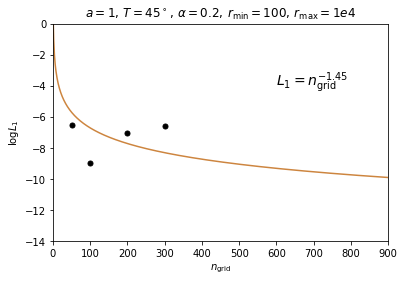

In [173]:
def map_cell_volume(x,field,xmin,xmax):
    dx_base  = xmax - xmin
    dx_high  = np.abs(x[1]-x[0])
    lower_index = np.argmin(np.abs(x-xmin))
    upper_index = np.argmin(np.abs(x-xmax))
    num_cells = upper_index - lower_index + 1
    if (num_cells==1):
        print dx_base,dx_high,field[lower_index]
        cell_volume = field[lower_index]*dx_high
    if (num_cells>=2):
        x_lower_right = x[lower_index] + dx_high/2.
        W_lower = (x_lower_right - xmin)/dx_base
        x_upper_left  = x[upper_index] - dx_high/2.
        W_upper = (dx_high - (xmax - x_upper_left))/dx_base
        cell_volume = field[lower_index]*W_lower*dx_base + field[upper_index]*W_upper*dx_base
        for i in range(lower_index+1,upper_index): # does nothing if num_cells == 2
            cell_volume += field[i]*dx_high
    return cell_volume

time_index = -1

xs = []
fs = []
for i in range(len(data_ngrid)):
    print "time = ", np.average(full_data[i]["t"][:,time_index])
    xs.append(np.log(full_data[i]["r"][:,time_index]))
    fs.append(full_data[i]["Lx"][:,time_index])

delta_x = (xs[0][1:] - xs[0][:-1])[0]

num_pts = len(xs[0])
reference_x = np.copy(xs[0])
reference_f = np.copy(fs[0])

nums = np.copy(data_ngrid)
Ss   = np.zeros(len(nums))
for run in range(1,len(nums)):
    for i in range(1,num_pts-1):
        xmin = reference_x[i] - delta_x/2.
        xmax = reference_x[i] + delta_x/2.
        reference_cell_volume = delta_x*reference_f[i]
        new_cell_volume       = map_cell_volume(xs[run],fs[run],xmin,xmax)
        Ss[run] += np.abs(new_cell_volume - reference_cell_volume)
Ss = np.array(Ss)/(num_pts-1)#/nums
#print "Ss: ", Ss
Ss -= Ss[-1]
Ss = np.abs(Ss)
print "logSs: ", np.log(Ss), "ns: ",nums
#print np.log(Ss[1:-1]),Ss[1:-1]
fit_x = np.log(nums[:-1])
fit_y = np.log(Ss[:-1])
p = np.polyfit(fit_x,fit_y,deg=1)
m = np.linalg.lstsq(fit_x.reshape(-1,1), fit_y)[0][0]
print "m = ", m
fit = lambda x: m*x# + p[1]
#print np.log(Ss[:-1]),Ss[1:-1]
plot_x = np.log(np.linspace(0,10000,10000))
plot_y = fit(plot_x)
plt.plot(np.exp(plot_x),plot_y,color='peru')
plt.scatter(np.exp(fit_x),fit_y,color='black',s=25,zorder=3)
plt.xlim(1,900)
plt.ylim(-14,0)
plt.xlabel(r'$n_{\rm grid}$')
plt.ylabel(r"${\rm log}{L_1}$")
plt.text(600,-4,r"$L_1 = n_{\rm grid}^{%3.2f}$" % m,fontsize=14)
plt.title(r'$a = 1,\,T=45^\circ,\,\alpha=0.2,\,r_{\rm min}=100,\,r_{\rm max}=1e4$')
plt.savefig('convergence_tilt45.pdf')

### Lets make a plotting interface, which we can test for one of our tables. 

### Lets say we want to plot the quantities as a movie. We do this by making .png frames of each snapshot and then combining them into a movie using ffmpeg. 
### We iterate through each table that we have generated, then we use our plotting interface to get the figure from matplotlib that we want. 
### Then, we just save this as a series of .png files. From command line, we can do this using ffmpeg, for instance:
### "ffmpeg -r 5 -s 1920x1080 -i tilt_%03d.png test.mp4"
### -r sets the frames per second; -s sets the resolution; -i sets the files we want to read, where %03d indicates we're look for integers of length 3, i.e. 1 --> 001, 10 --> 010, etc; and then test.mp4 is just the name of our file.
### We can do this interactively in jupyter notebook (auto = 1) and remove the .png files afterwards, if we want, as well (clean = 1)

In [11]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/inner_a1_h02_plm_6panel_short_q2d_gr"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,1000,2):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface(full_data,i)
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/nkaaz/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>